### 0. 데이터로딩

In [2]:
import joblib
import pandas as pd
def get_nouns(text):
    return 1
with open('tdm.pkl', 'rb') as f:
    data = joblib.load(f)
    print(data.keys())
    locals().update(data)
    del data
df = pd.read_csv('review_full.csv')

dict_keys(['cv', 'tfidf', 'tdm_cv', 'tdm_tfidf'])


## 1. LSA

In [3]:
tdm_tfidf.shape

(36477, 1000)

In [4]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=30)

In [5]:
pos = svd.fit_transform(tdm_tfidf)
pos.shape

(36477, 30)

In [12]:
df.평점.value_counts()

5.0    16335
4.0    13131
3.0     4814
2.0     1166
1.0      864
0.0      167
Name: 평점, dtype: int64

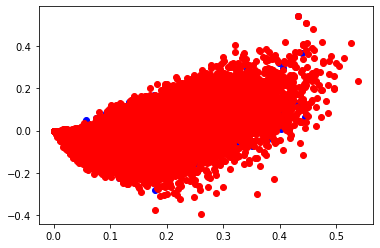

In [23]:
import matplotlib.pyplot as plt
dim0 = 0
dim1 = 1
plt.plot(pos[df.평점==1, dim0], pos[df.평점==1, dim1], 'bo') # 1점은 파란색
plt.plot(pos[df.평점==5, dim0], pos[df.평점==5, dim1], 'ro') # 5점은 빨간색

In [25]:
from sklearn.preprocessing import Normalizer
norm = Normalizer(copy=False)
pos2 = norm.fit_transform(pos)

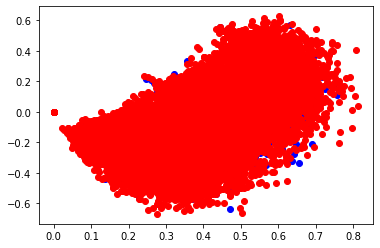

In [28]:
dim0 = 0
dim1 = 1
plt.plot(pos2[df.평점==1, dim0], pos2[df.평점==1, dim1], 'bo') # 1점은 파란색
plt.plot(pos2[df.평점==5, dim0], pos2[df.평점==5, dim1], 'ro') # 5점은 빨간색

In [29]:
from sklearn.pipeline import make_pipeline
svd = TruncatedSVD(n_components=30)
norm = Normalizer(copy=False)
lsa = make_pipeline(svd, norm)

In [32]:
pos3 = lsa.fit_transform(tdm_cv)

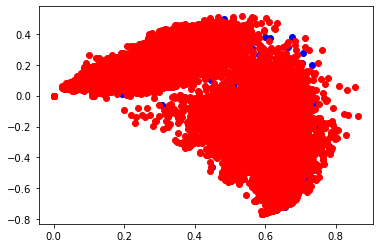

In [33]:
dim0 = 0
dim1 = 1
plt.plot(pos3[df.평점==1, dim0], pos3[df.평점==1, dim1], 'bo') # 1점은 파란색
plt.plot(pos3[df.평점==5, dim0], pos3[df.평점==5, dim1], 'ro') # 5점은 빨간색

## 2. LDA

In [35]:
words = cv.get_feature_names()

In [37]:
word_dict = dict(enumerate(words))
word_dict

{0: '!!',
 1: '!!!',
 2: '가게',
 3: '가격',
 4: '가도',
 5: '가루',
 6: '가리비',
 7: '가면',
 8: '가보',
 9: '가시',
 10: '가야',
 11: '가이드',
 12: '가정',
 13: '가족',
 14: '가지',
 15: '가짓수',
 16: '가치',
 17: '각종',
 18: '간격',
 19: '간식',
 20: '간장',
 21: '간판',
 22: '갈비',
 23: '갈비탕',
 24: '감동',
 25: '감사',
 26: '감안',
 27: '감자',
 28: '감자 튀김',
 29: '감자탕',
 30: '강남',
 31: '개인',
 32: '객실',
 33: '거리',
 34: '걱정',
 35: '건강',
 36: '건너편',
 37: '건담',
 38: '건물',
 39: '건지',
 40: '검색',
 41: '게장',
 42: '겨울',
 43: '결정',
 44: '경우',
 45: '경주',
 46: '경치',
 47: '경험',
 48: '계단',
 49: '계란',
 50: '계산',
 51: '계속',
 52: '계절',
 53: '계획',
 54: '고객',
 55: '고급',
 56: '고기',
 57: '고기국수',
 58: '고려',
 59: '고민',
 60: '고베',
 61: '고추',
 62: '고추장',
 63: '골목',
 64: '곰탕',
 65: '곱창',
 66: '곳도',
 67: '공간',
 68: '공기',
 69: '공연',
 70: '공유',
 71: '공항',
 72: '과일',
 73: '과자',
 74: '과정',
 75: '관광',
 76: '관광객',
 77: '관광지',
 78: '관리',
 79: '관심',
 80: '광고',
 81: '광안리',
 82: '광화문',
 83: '구경',
 84: '구매',
 85: '구사',
 86: '구성',
 87: '구이',
 88: '구입',
 89: '국물',
 90

In [42]:
from gensim.matutils import Sparse2Corpus
corpus = Sparse2Corpus(tdm_cv.T)

In [46]:
tdm_cv.shape

(36477, 1000)

In [48]:
from gensim.models.ldamodel import LdaModel
# 주제의 수는 사람이 결정
# passes, iterations : 크면클수록 안정적 결과
np.random.seed(123)
lda = LdaModel(corpus=corpus, num_topics=100, passes=3,
               iterations=100, id2word=word_dict)

In [49]:
lda.show_topic(0)

[('부산역', 0.32177186),
 ('요청', 0.22023596),
 ('타이', 0.12879394),
 ('발리', 0.12786213),
 ('위층', 0.08071742),
 ('위치', 0.03867282),
 ('음식', 0.029495724),
 ('주문', 0.014869005),
 ('식사', 0.009211435),
 ('고객', 0.0065540303)]

In [50]:
lda.show_topic(2)

[('대부분', 0.25298467),
 ('관광', 0.11796317),
 ('남자', 0.081106946),
 ('브런치', 0.07762248),
 ('경치', 0.06614715),
 ('유리', 0.050314803),
 ('아이스', 0.04801052),
 ('해결', 0.047206227),
 ('실제', 0.0427407),
 ('음식', 0.030272555)]

In [57]:
# 문서의 주제 확인 : 단어 번호와 빈도로 이루어진 Bag-of-Words를 생성
raw = tdm_cv[0]
doc = list(zip(raw.indices, raw.data))
doc

[(2, 1), (29, 1), (121, 1), (146, 1), (474, 1), (719, 2)]

In [58]:
doc_words = [(words[i], n) for i, n in doc]
doc_words

[('가게', 1), ('감자탕', 1), ('김치', 1), ('느낌', 1), ('식당', 1), ('정도', 2)]

In [59]:
lda.get_document_topics(doc)

[(16, 0.12625098),
 (37, 0.25585),
 (45, 0.17181301),
 (57, 0.14713661),
 (62, 0.180198)]

In [61]:
lda.show_topic(62)

[('가게', 0.259456),
 ('처음', 0.25258726),
 ('냉면', 0.11230256),
 ('지금', 0.102418154),
 ('자극', 0.041236725),
 ('생각', 0.037144694),
 ('방문', 0.03564293),
 ('프랜차이즈', 0.032939497),
 ('추천', 0.027422985),
 ('가격', 0.026906475)]

In [62]:
lda.save('lda_test.lda')

In [63]:
lda2 = LdaModel.load('lda_test.lda')